# 인공 신경망 구조 이해하기

In [2]:
!pip install matplotlib

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     ---------------------- ---------------- 92.2/162.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.7 MB 7.0 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/7.7 MB 10.8 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.7 MB 16.1 MB/s eta 0:00:01
   ------------------- -------------------- 3.8/7.7 MB 22.1 MB/s eta 0:00:01
   -------------------------- ------------- 5.1/7.7 MB 23.2 MB/s eta 0:00:01
   -------------------------------------- - 7.5/7.7 MB 29.8 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.7 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.7 MB 21.0 MB/s eta 0:00:01
   ------

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random

# Write neural network code
class NeuralNetwork(nn.Module):

    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(1, 6)
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(6, 1)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.activation(x)
        x = self.output_layer(x)
        return x

# Define the network and the loss function.
network = NeuralNetwork()
loss_function = nn.MSELoss()

# Steps for gradient descent.
# 'lr' stands for learning rate.
optimizer = torch.optim.Adam(network.parameters(), lr=0.001)

# Training one step with sample data
x = torch.Tensor([1])
y = x**3 + x**2 - x - 1


optimizer.zero_grad()
output = network(x)
loss = loss_function(y, output)
loss.backward()
optimizer.step()

# Check parameters
parameters = network.input_layer.state_dict()
w = parameters['weight']  # e.g. [-5, -1.2, 1.2, 1.2, 2, 5]
b = parameters['bias']  # e.g. [-7.7, -1.3, 1, -0.2, -1.1, -5]
print(w)
print(b)

tensor([[ 0.2568],
        [-0.5326],
        [ 0.5492],
        [-0.4048],
        [-0.2752],
        [-0.9505]])
tensor([ 0.7266, -0.6060,  0.8176,  0.3272,  0.5392, -0.9395])


In [10]:
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define the network and the loss function.
network = NeuralNetwork()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

pbar = tqdm(range(10000), desc="Loss: --")
for epoch in pbar:
    x = torch.randn(1)
    y = x**3 + x**2 - x - 1

    optimizer.zero_grad()
    output = network(x)
    loss = loss_function(y, output)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        pbar.set_description(f"Loss: {loss.item():.3f}")

Loss: 0.849: 100%|██████████| 10000/10000 [00:06<00:00, 1579.75it/s]


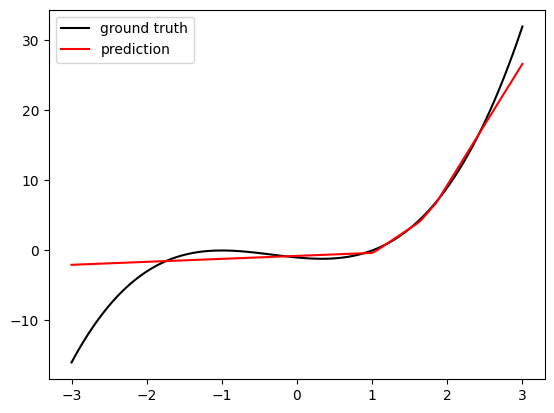

In [11]:
# plot the result
x_lim = 3
num_points = 100

x = torch.linspace(-x_lim, x_lim, num_points)
y = x**3 + x**2 - x - 1
plt.plot(x, y, label="ground truth", color="black")
plt.plot(x, network(x[:, None]).detach().numpy(), label="prediction", color="red")
plt.legend()
plt.show()